## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [124]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [126]:
df_num = df.select_dtypes(exclude=['object'])
df_num.shape

(244, 3)

In [127]:
df_cat = df.select_dtypes(include=['object'])
df_cat.shape

(244, 4)

In [128]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Compute the average bill amount for each day.

In [129]:
avg = df.groupby('day')['total_bill'].mean()
avg

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [130]:
gen = df.groupby('sex')['tip'].mean()
gen

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [131]:
df.groupby('time')['size'].count()
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [132]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [133]:
df.groupby('day')['size'].sum().sort_values()

day
Fri      40
Thur    152
Sun     216
Sat     219
Name: size, dtype: int64

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [134]:
df.skew()

total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

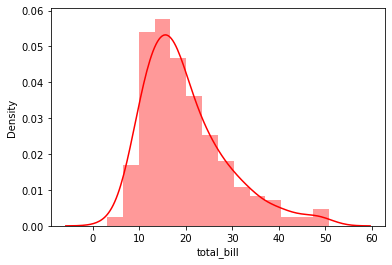

In [135]:
df.total_bill.skew()
sns.distplot(df['total_bill'],color='red')
plt.show()

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [136]:
df[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


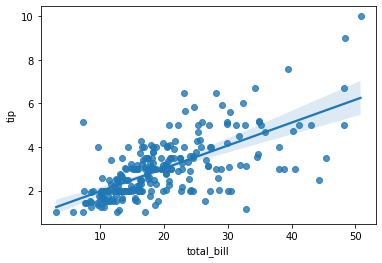

In [137]:
sns.regplot(x='total_bill',y='tip',data=df)
plt.show()

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [138]:
df['sex'].value_counts(normalize=True)*100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

<AxesSubplot:ylabel='sex'>

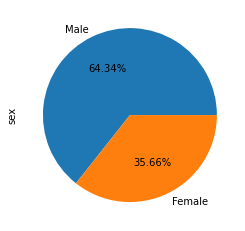

In [139]:
df['sex'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [140]:
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: smoker, dtype: int64

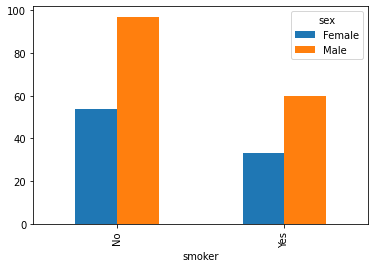

In [141]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

In [142]:
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

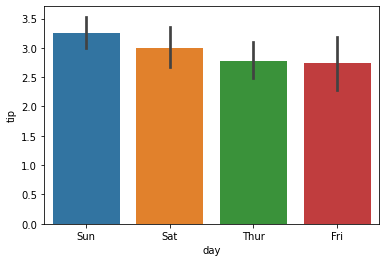

In [143]:
sns.barplot(x='day',y='tip',data=df)
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [144]:
df.groupby('size')['total_bill'].mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

Text(0, 0.5, 'Avg Total Bill Amount')

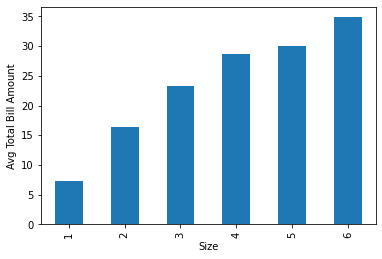

In [145]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.xlabel('Size')
plt.ylabel('Avg Total Bill Amount')

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

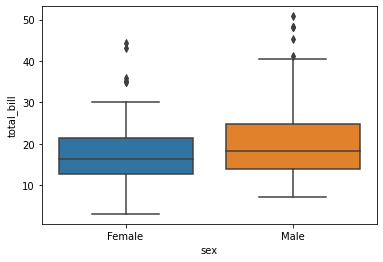

In [146]:
sns.boxplot(x='sex',y='total_bill',data=df)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [147]:
ser

time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

In [148]:
df[(df['time'].isin(['Lunch', 'Dinner'])) & (df['day'].isin(['Sat', 'Sun']))].groupby(['time','day'])['total_bill'].max()

time    day
Dinner  Sat    50.81
        Sun    48.17
Name: total_bill, dtype: float64

In [149]:
df_x = df.groupby(['time','day'], as_index=False)['total_bill'].max()
df_x[ (df_x['day'] == 'Sat') | (df_x['day'] == 'Sun')]

,time,day,total_bill
1,Dinner,Sat,50.81
2,Dinner,Sun,48.17


### 15. Compute the percentage of missing values in the dataset.

In [150]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [151]:
len(df[df.duplicated()])

1

In [152]:
df.drop_duplicates(inplace=True)

In [153]:
len(df[df.duplicated()])

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

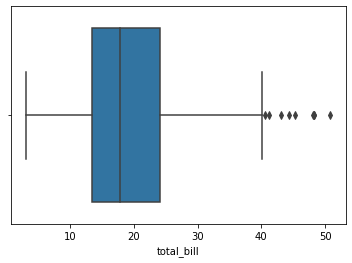

In [154]:
sns.boxplot(df['total_bill'])
plt.show()

In [155]:
df['total_bill_transformed'] = np.log(df['total_bill'])

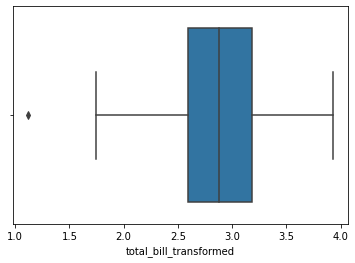

In [156]:
sns.boxplot(df['total_bill_transformed'])
plt.show()

In [157]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_transformed
0,16.99,1.01,Female,No,Sun,Dinner,2,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,3.202340


### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

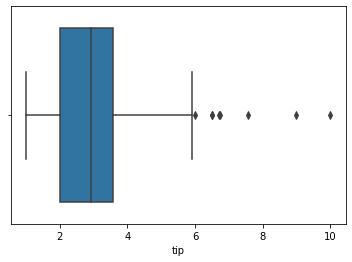

In [158]:
sns.boxplot(df['tip'])
plt.show()

In [159]:
Q1 = df['tip'].quantile(0.25) 
Q3 = df['tip'].quantile(0.75) 

IQR = Q3 - Q1

lower_whisker = Q1 - (1.5*IQR)
upper_whisker = Q3 + (1.5*IQR)

In [160]:
df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)]

In [161]:
df_out.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_transformed
0,16.99,1.01,Female,No,Sun,Dinner,2,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,3.202340


### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [162]:
df1 = pd.get_dummies(df, drop_first=True)
df1.head(5)

# get_dummies - works on all the categorical columns in a dataframe and is available in pandas
# one hot encoding - works on selected column and is available in sklearn library

,total_bill,tip,size,total_bill_transformed,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,2.832625,0,0,0,1,0,0
1,10.34,1.66,3,2.336020,1,0,0,1,0,0
2,21.01,3.50,3,3.044999,1,0,0,1,0,0
3,23.68,3.31,2,3.164631,1,0,0,1,0,0
4,24.59,3.61,4,3.202340,0,0,0,1,0,0


In [163]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_transformed
0,16.99,1.01,Female,No,Sun,Dinner,2,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,3.202340


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [164]:
tb_max = df['total_bill'].max()
print('Max', tb_max)
tb_min = df['total_bill'].min()
print('Min', tb_min)

Max 50.81
Min 3.07


In [165]:
range = tb_max-tb_min
print('Range before transformation', range)

Range before transformation 47.74


In [166]:
mm=MinMaxScaler()
df['total_bill_mm']=mm.fit_transform(df[['total_bill']])
tb_mm_max=df['total_bill_mm'].max()
tb_mm_min=df['total_bill_mm'].min()
range_=tb_mm_max-tb_mm_min
print('Range after MinMaxScaler transformation', range_)

Range after MinMaxScaler transformation 0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [167]:
tips_df = pd.read_csv('tips.csv')
tips_df = pd.get_dummies(df, drop_first=True)
tips_df.head() 

,total_bill,tip,size,total_bill_transformed,total_bill_mm,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,2.832625,0.291579,0,0,0,1,0,0
1,10.34,1.66,3,2.336020,0.152283,1,0,0,1,0,0
2,21.01,3.50,3,3.044999,0.375786,1,0,0,1,0,0
3,23.68,3.31,2,3.164631,0.431713,1,0,0,1,0,0
4,24.59,3.61,4,3.202340,0.450775,0,0,0,1,0,0


In [168]:
X = tips_df.drop('tip',axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

mm=MinMaxScaler()

X_train['total_bill'] = mm.fit_transform(X_train[['total_bill']])
X_train['size']=mm.fit_transform(X_train[['size']])
X_test['total_bill'] = mm.fit_transform(X_test[['total_bill']])
X_test['size']=mm.fit_transform(X_test[['size']])

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [170]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [171]:
y_pred = regression_model.predict(X_test)

print('R Squared value is:', r2_score(y_test, y_pred))

R Squared value is: 0.36362067701949974


### Happy Learning:)